<a href="https://colab.research.google.com/github/1aaronscott/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [27]:
def mean(val):
  return sum(val)/len(val)

def variance(val):
  return sum([(x - mean(val))**2 for x in val])/(len(val)) # assumes population instead of sample

def stddev(val):
  return variance(val)**0.5

sales = ([3505, 2400, 3027, 2798, 3700, 3250, 2689])
print("Mean is", mean(sales))
print("Variance is", variance(sales))
print("Standard Deviation is", stddev(sales))


Mean is 3052.714285714286
Variance is 183761.06122448976
Standard Deviation is 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [28]:
import numpy as np
customers = ([127, 80, 105, 92, 120, 115, 93])
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [29]:
stddev(customers)

15.792015549069118

In [30]:
np.cov(sales, customers, ddof=0)/(stddev(sales) * stddev(customers))

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [31]:
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [18]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [19]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [20]:
df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [32]:
df_numeric = df.drop(columns=['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'])
df_numeric.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [33]:
np.cov(df_numeric)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [0]:
#won't work with NaNs so drop any rows with them and retry
df_numeric.dropna(inplace=True)
df_numeric


In [36]:
df_numeric.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,149545.712535,295.683123,0.0,-2380.187123,33.535714,35.835434,-8275.289466,74.095588,-94.711485
pclass,295.683123,0.722619,0.0,-5.854237,0.044958,0.064006,-21.314407,-3.609454,-0.252661
survived,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
age,-2380.187123,-5.854237,0.0,196.811725,-2.098180,-0.197126,160.509930,61.705181,2.593264
sibsp,33.535714,0.044958,0.0,-2.098180,0.800840,0.168908,8.326293,-8.486975,-0.018487
parch,35.835434,0.064006,0.0,-0.197126,0.168908,0.725770,5.140167,4.511345,0.016246
fare,-8275.289466,-21.314407,0.0,160.509930,8.326293,5.140167,1810.523420,-179.164684,10.117269
body,74.095588,-3.609454,0.0,61.705181,-8.486975,4.511345,-179.164684,9539.839706,3.880672
has_cabin_number,-94.711485,-0.252661,0.0,2.593264,-0.018487,0.016246,10.117269,3.880672,0.197199


In [37]:
df_numeric.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.899466,NaN,-0.438731,0.096905,0.108774,-0.502914,0.001962,-0.551523
pclass,0.899466,1.000000,NaN,-0.490897,0.059099,0.088382,-0.589273,-0.043473,-0.669316
survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.438731,-0.490897,NaN,1.000000,-0.167126,-0.016494,0.268890,0.045032,0.416264
sibsp,0.096905,0.059099,NaN,-0.167126,1.000000,0.221552,0.218664,-0.097098,-0.046521
parch,0.108774,0.088382,NaN,-0.016494,0.221552,1.000000,0.141800,0.054217,0.042945
fare,-0.502914,-0.589273,NaN,0.268890,0.218664,0.141800,1.000000,-0.043110,0.535438
body,0.001962,-0.043473,NaN,0.045032,-0.097098,0.054217,-0.043110,1.000000,0.089471
has_cabin_number,-0.551523,-0.669316,NaN,0.416264,-0.046521,0.042945,0.535438,0.089471,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

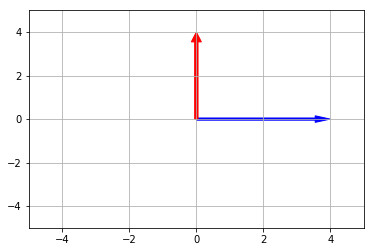

In [47]:
import matplotlib.pyplot as plt
vec1 = [4,0]
vec2 = [0,4]
plt.grid(True, which='both')
plt.arrow(0, 0, vec1[0], vec1[1], color='blue', length_includes_head=True, width=.1)
plt.arrow(0, 0, vec2[0], vec2[1], color='red',  length_includes_head=True, width=.1)
plt.ylim(5)
plt.xlim(5)
plt.axis([-5, 5, -5, 5])
plt.show();

A synonym for orthogonal is right angle.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [48]:
a = ([-5, 3, 7])
b = ([6, -8, 2])
np.dot(a, b)

-40

No because orthogonal vectors have a dot product of zero but the dot product of these is -40.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
c = np.array([2, -15, 6, 20])

$||c||^2$

In [59]:
np.linalg.norm(c)**2

665.0

$c \cdot c$

In [60]:
np.dot(c, c)

665

$c^{T}c$

In [57]:
np.matmul(c.T, c)

665

The sqaure of a vector's magnitude, the dot product of a vector with itself, and the transpose of a vector multiplied by the vector are all equal.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0\\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [62]:
f = np.array([4, 12, 11, 9, 2])
unit_f = f/np.linalg.norm(f)
print(unit_f)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Linearly independent

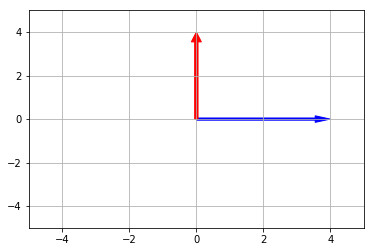

In [63]:
import matplotlib.pyplot as plt
vec1 = [4,0]
vec2 = [0,4]
plt.grid(True, which='both')
plt.arrow(0, 0, vec1[0], vec1[1], color='blue', length_includes_head=True, width=.1)
plt.arrow(0, 0, vec2[0], vec2[1], color='red',  length_includes_head=True, width=.1)
plt.ylim(5)
plt.xlim(5)
plt.axis([-5, 5, -5, 5])
plt.show();

Linearly dependent

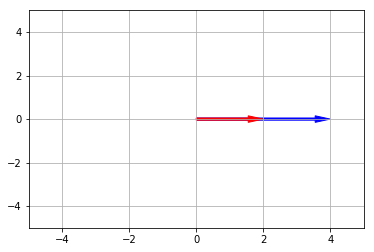

In [64]:
import matplotlib.pyplot as plt
vec1 = [4,0]
vec2 = [2,0]
plt.grid(True, which='both')
plt.arrow(0, 0, vec1[0], vec1[1], color='blue', length_includes_head=True, width=.1)
plt.arrow(0, 0, vec2[0], vec2[1], color='red',  length_includes_head=True, width=.1)
plt.ylim(5)
plt.xlim(5)
plt.axis([-5, 5, -5, 5])
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

\begin{align}
gh = \begin{bmatrix} 1 \ 4 \\ 2 \ 8 \end{bmatrix}
\end{align}

In [1]:
gh = ([1,2], [4, 8])


([1, 2], [4, 8])

In [5]:
np.linalg.matrix_rank(gh)

1

The span is one dimensional space (R1)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

\begin{align}
lmn = \begin{bmatrix} 1 \ -1\ 4 \\ 2 \ 0 \ 8 \\ 3\ 7\ 2\end{bmatrix}
\end{align}

In [7]:
lmn = ([1,2,3], [-1,0,7],[4,8,2])
np.linalg.matrix_rank(lmn)

3

The span is three dimensional space (R3)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



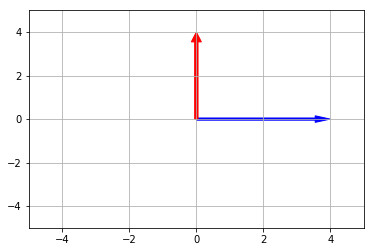

In [8]:
import matplotlib.pyplot as plt
vec1 = [4,0]
vec2 = [0,4]
plt.grid(True, which='both')
plt.arrow(0, 0, vec1[0], vec1[1], color='blue', length_includes_head=True, width=.1)
plt.arrow(0, 0, vec2[0], vec2[1], color='red',  length_includes_head=True, width=.1)
plt.ylim(5)
plt.xlim(5)
plt.axis([-5, 5, -5, 5])
plt.show();

## 6.2 What does it mean to form a basis?

Vectors for a basis when they are lineraly independent and can be combined in such a way as to map out and entire space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [9]:
p = ([1,2,3], [-1,0,7],[4,8,2])
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of space spanned by its columns.

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

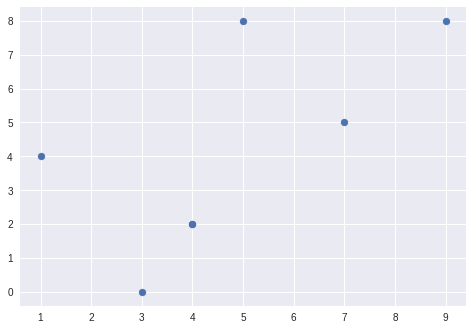

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()